<a href="https://colab.research.google.com/github/RiddhimanRaut/My_Drake_Adventure/blob/main/PyDrake_Tutorial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's install PyDrake

In [55]:
import importlib
import sys
from urllib.request import urlretrieve

if 'google.colab' in sys.modules and importlib.util.find_spec('manipulation') is None:
    urlretrieve(f"http://manipulation.csail.mit.edu/scripts/setup/setup_manipulation_colab.py",
                "setup_manipulation_colab.py")
    from setup_manipulation_colab import setup_manipulation
    setup_manipulation(manipulation_sha='c1bdae733682f8a390f848bc6cb0dbbf9ea98602', drake_version='0.27.0', drake_build='release')

server_args = []
if 'google.colab' in sys.modules:
  server_args = ['--ngrok_http_tunnel']

from manipulation import running_as_notebook


First, We create our System using the LeafSystem library. Here we have created a system:
$\dot{x} = {x^2},$
$y = x$.
Using the LeafSystem removes the issues of using SymbolicVariables.


In [56]:
from pydrake.systems.framework import BasicVector, LeafSystem

class ContinuousTimeSystem(LeafSystem):
  def __init__(self):
    LeafSystem.__init__(self)

    self.DeclareContinuousState(1) #1 state variable
    self.DeclareVectorOutputPort("y", BasicVector(1), self.CopyOutputState)
  
  def DoCalcTimeDerivatives(self, context, derivatives):
    x = context.get_continuous_state_vector().GetAtIndex(0)
    xdot = -x + x**3
    derivatives.get_mutable_vector().SetAtIndex(0, xdot)

  def CopyOutputState(self, context, output):
    x = context.get_continuous_state_vector().CopyToVector() #copies to eigenvector
    output.SetFromVector(x)

Now that we have created our system along with its dynamics, let's create our diagram and simulator!

In [62]:
%matplotlib inline 
import matplotlib.pyplot as plt
from pydrake.systems.analysis import Simulator
from pydrake.systems.framework import DiagramBuilder
from pydrake.systems.primitives import LogOutput

#creating the diagram
builder = DiagramBuilder()
system = builder.AddSystem(ContinuousTimeSystem())
logger = LogOutput(system.get_output_port(), builder)
diagram = builder.Build()
diagram.set_name('Continuous State Diagram')

Our diagram has been built. Before simulating, we need to have a starting condition. We do it through initialising the context.


In [63]:
context = diagram.CreateDefaultContext()
context.SetContinuousState([0.9])
print(context)

::Continuous State Diagram Context (of a Diagram)
--------------------------------------------------
1 total continuous states

::Continuous State Diagram::__main__.ContinuousTimeSystem@000055c149b6adc0 Context
-----------------------------------------------------------------------------------
Time: 0
States:
  1 continuous states
    0.9




Simulation time!

In [64]:
simulator = Simulator(diagram, context)
simulator.AdvanceTo(10)

The output of that simulation will be stored in the logger. Let's plot it!

Text(0, 0.5, 'y(t)')

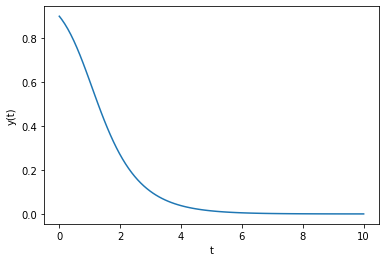

In [65]:
plt.figure()
plt.plot(logger.sample_times(), logger.data().transpose())
plt.xlabel('t')
plt.ylabel('y(t)')

Let's see how the diagram looks like!

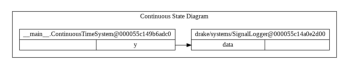

In [67]:
from pydrake.systems.drawing import plot_system_graphviz
plt.figure()
plot_system_graphviz(diagram, max_depth = 2)